## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt


In [2]:
#creating an instance of the class
env = TicTacToe()

In [3]:
import time 

In [4]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [5]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [6]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [7]:
# Checking the initial environment state which is 9 positions of x
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [8]:
# Checking all the possible actions of Agent. It should be odd numbers in all the state
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

- We can see that all the 9 positions have the values of Agent as odd numbers. The function valid_actions has returned all possible actions to all the state available for an Agent.

In [9]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state for environment

def envvalid_actions(state):

    envvalid_actions = []
    
    envvalid_actions = [i for i in env.action_space(state)[1]]
    return envvalid_actions

In [10]:
# Checking all the possible actions of Environment. It should be even numbers in all the state
envvalid_actions(env.state)

[(0, 2),
 (0, 4),
 (0, 6),
 (0, 8),
 (1, 2),
 (1, 4),
 (1, 6),
 (1, 8),
 (2, 2),
 (2, 4),
 (2, 6),
 (2, 8),
 (3, 2),
 (3, 4),
 (3, 6),
 (3, 8),
 (4, 2),
 (4, 4),
 (4, 6),
 (4, 8),
 (5, 2),
 (5, 4),
 (5, 6),
 (5, 8),
 (6, 2),
 (6, 4),
 (6, 6),
 (6, 8),
 (7, 2),
 (7, 4),
 (7, 6),
 (7, 8),
 (8, 2),
 (8, 4),
 (8, 6),
 (8, 8)]

- We can see that all the 9 positions have the values of Environment as Even numbers. The function envvalid_actions has returned all possible actions to all the state available for an Environment.

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [11]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # Choosing random z value
    z = np.random.random() # Randomizes a number to select whether or not to exploit
    ## As per the Epsilon -greedy policy if z>e then Exploitation else Exploration based on the random choices.    
    if z > epsilon:
        #Exploitation: this gets the action corresponding to max q-value of current state
        state_val = Q_state(state)
        action = max(Q_dict[state_val],key=Q_dict[state_val].get)   #This gets the action corresponding to max q-value of current state
    else:
        #Exploration: randomly choosing and action. But the random values are limited to available values in 0-9
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    
    
    return action



#### Tracking the state-action pairs for checking convergence - write your code here

In [12]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [13]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-8-x-7-x-x-x',(0,5)),
                       ('1-x-x-8-x-x-x-x-x',(2,5)),('7-x-x-x-x-x-2-x-x',(1,3))]    #selecting 4 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []  

In [14]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [15]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [16]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [17]:
EPISODES = 50000
LR = 0.01                   # learning rate
GAMMA = 0.91                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001        # epsilon decay rate
threshold = 200       # no of episodes after which states_tracked will be saved
policy_threshold = 300   # no of episodes after which Q dictionary/table will be saved

### Q-update loop ---write your code here

In [18]:
start_time = time.time()

for episode in range(EPISODES):

    env = TicTacToe()  #creating an instance of the class
    initial_state = env.state    #for the purpose of tracking reward
    curr_state = env.state    #for the purpose of tracking reward
    done = False  
    add_to_dict(curr_state)  # adding the current state to dictionary
    time_step = 0
    reward = None
    total_reward = 0

    while done != True:  
        new_state = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epsilon method
        # Take the action and observe the new state and reward
        next_state, reward, done = env.step(curr_state, curr_action)
        next_state_new = Q_state(next_state)
        add_to_dict(next_state)        

        # UPDATE RULE
        if done != True:
            max_qvalue = max(Q_dict[next_state_new],key=Q_dict[next_state_new].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[new_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_new][max_qvalue])))
                                                      - Q_dict[new_state][curr_action] ) 
        else:
            Q_dict[new_state][curr_action] += LR * ((reward - Q_dict[new_state][curr_action]))

        curr_state = next_state  #state(t) became state(t-1). Moving to the next state
        total_reward += reward
        
      
    #states tracking   
    if ((episode+1)%threshold)==0:  #For every 200th episodes, the States will be saved
        save_tracking_states()
        save_obj(States_track,'States_tracked')

    if ((episode+1)% policy_threshold) == 0:  #For every 300th episodes, the Policy will be saved
        save_obj(Q_dict,'Policy')     
    
    
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

#### Check the Q-dictionary

In [19]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.006761892737259,
              (0, 3): -1.0067603131581335,
              (0, 5): -1.006761379905671,
              (0, 7): -1.0067519065858914,
              (0, 9): -1.0067489740184168,
              (1, 1): -1.0067587832805773,
              (1, 3): -1.00674017640081,
              (1, 5): -1.0067513354601085,
              (1, 7): -1.0067391695235033,
              (1, 9): -1.0067526249280407,
              (2, 1): -1.0067579784877465,
              (2, 3): -1.006740440779275,
              (2, 5): -1.0067428543247214,
              (2, 7): -1.0067469544654122,
              (2, 9): -1.0067584148049407,
              (3, 1): -1.0067617852111828,
              (3, 3): -1.0067610126687323,
              (3, 5): -1.0067602161209415,
              (3, 7): -1.0067616907058023,
              (3, 9): -1.0067389944064788,
              (4, 1): -1.006762118559247,
              (4, 3): -1.0067605015971273,
              (4, 5):

In [20]:
len(Q_dict)

130299

In [21]:
keys = [k for k, v in Q_dict.items()]

print(keys[9:12])

['x-x-x-x-x-2-x-9-x', 'x-x-x-8-x-2-x-9-5', '6-x-3-8-x-2-x-9-5']


In [22]:
print(keys[61:64])

['1-x-x-x-x-x-x-4-x', '1-x-8-x-x-7-x-4-x', '1-x-8-2-5-7-x-4-x']


In [24]:
print(keys[104:108])

['5-x-x-x-x-x-6-x-x', '5-4-1-x-x-x-6-x-x', '5-4-1-2-x-x-6-x-9', '5-4-1-2-8-x-6-3-9']


- We can see from these samples that the learning is considering the count of 15 vertical, diagonal(both left and right). The Algorithm is converging.

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [ ]:
# Write the code for plotting the graphs for state-action pairs tracked

<function matplotlib.pyplot.show(close=None, block=None)>

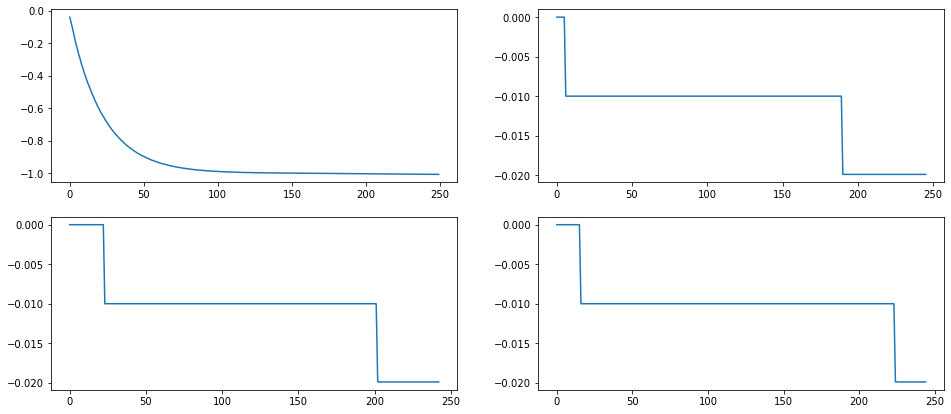

In [25]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-8-x-7-x-x-x'][(0,5)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-x-x-8-x-7-x-x-x'][(0,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['1-x-x-8-x-x-x-x-x'][(2,5)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['1-x-x-8-x-x-x-x-x'][(2,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['7-x-x-x-x-x-2-x-x'][(1,3)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['7-x-x-x-x-x-2-x-x'][(1,3)]))
plt.show

### Epsilon - decay check

In [26]:
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

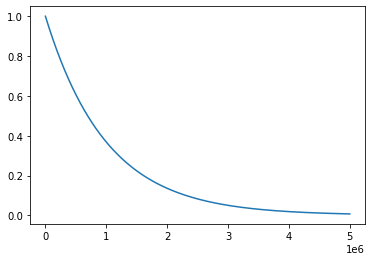

In [27]:
plt.plot(time, epsilon)
plt.show()